### Capstone Project

### Cryptocurrency_Price_Prediction

#### Using Deep Learning:

##### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM,GRU
import math
import statistics
import statsmodels
import sklearn
from sklearn.metrics import mean_squared_error

##### Importing Data:


In [2]:
data = pd.read_csv("C:\\Users\\Hp\\OneDrive\\Documents\\Ds_Data\\all_currencies.csv")
data

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN
...,...,...,...,...,...,...,...,...,...
645779,189,2018-05-29,ZZC,0.097595,0.101948,0.082738,0.083027,590.0,189967.0
645780,190,2018-05-30,ZZC,0.083082,0.118589,0.056165,0.082957,263.0,161719.0
645781,191,2018-05-31,ZZC,0.082941,0.123240,0.082536,0.121377,52.0,161444.0
645782,192,2018-06-01,ZZC,0.071372,0.102548,0.071372,0.100614,47.0,138924.0


In [3]:
# Removing Unnecessary columns
data.drop(['Unnamed: 0','Symbol','Market Cap'], axis = 1, inplace = True)
data

,Date,Open,High,Low,Close,Volume
0,2015-11-12,0.000013,0.000017,0.000013,0.000017,142.0
1,2015-11-13,0.000017,0.000033,0.000016,0.000024,85.0
2,2015-11-14,0.000024,0.000053,0.000023,0.000030,131.0
3,2015-11-15,0.000030,0.000063,0.000022,0.000035,132.0
4,2015-11-16,0.000035,0.000046,0.000032,0.000036,280.0
...,...,...,...,...,...,...
645779,2018-05-29,0.097595,0.101948,0.082738,0.083027,590.0
645780,2018-05-30,0.083082,0.118589,0.056165,0.082957,263.0
645781,2018-05-31,0.082941,0.123240,0.082536,0.121377,52.0
645782,2018-06-01,0.071372,0.102548,0.071372,0.100614,47.0


In [4]:
# Converting Data into datetime formate
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
# Check information of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645784 entries, 0 to 645783
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    645784 non-null  datetime64[ns]
 1   Open    645784 non-null  float64       
 2   High    645784 non-null  float64       
 3   Low     645784 non-null  float64       
 4   Close   645784 non-null  float64       
 5   Volume  640028 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 29.6 MB


In [6]:
data.insert(1,'Date1',data['Date'].values)

In [7]:
data

,Date,Date1,Open,High,Low,Close,Volume
0,2015-11-12,2015-11-12,0.000013,0.000017,0.000013,0.000017,142.0
1,2015-11-13,2015-11-13,0.000017,0.000033,0.000016,0.000024,85.0
2,2015-11-14,2015-11-14,0.000024,0.000053,0.000023,0.000030,131.0
3,2015-11-15,2015-11-15,0.000030,0.000063,0.000022,0.000035,132.0
4,2015-11-16,2015-11-16,0.000035,0.000046,0.000032,0.000036,280.0
...,...,...,...,...,...,...,...
645779,2018-05-29,2018-05-29,0.097595,0.101948,0.082738,0.083027,590.0
645780,2018-05-30,2018-05-30,0.083082,0.118589,0.056165,0.082957,263.0
645781,2018-05-31,2018-05-31,0.082941,0.123240,0.082536,0.121377,52.0
645782,2018-06-01,2018-06-01,0.071372,0.102548,0.071372,0.100614,47.0


In [8]:
df = data[['Date','Date1']]

In [9]:
df

,Date,Date1
0,2015-11-12,2015-11-12
1,2015-11-13,2015-11-13
2,2015-11-14,2015-11-14
3,2015-11-15,2015-11-15
4,2015-11-16,2015-11-16
...,...,...
645779,2018-05-29,2018-05-29
645780,2018-05-30,2018-05-30
645781,2018-05-31,2018-05-31
645782,2018-06-01,2018-06-01


In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df

,Date,Date1
0,2015-11-12,2015-11-12
1,2015-11-13,2015-11-13
2,2015-11-14,2015-11-14
3,2015-11-15,2015-11-15
4,2015-11-16,2015-11-16
...,...,...
86592,2013-05-04,2013-05-04
86593,2013-05-05,2013-05-05
86594,2013-05-06,2013-05-06
86595,2013-05-07,2013-05-07


In [12]:
lst = list(df.index)

In [13]:
lst1 = []
for i in data.index:
    if i not in lst:
        lst1.append(i)

In [14]:
lst1[0]

933

In [15]:
len(lst1)

643922

In [16]:
data.drop(index = lst1, axis = 0, inplace = True)

In [17]:
data

,Date,Date1,Open,High,Low,Close,Volume
0,2015-11-12,2015-11-12,0.000013,0.000017,0.000013,0.000017,142.0
1,2015-11-13,2015-11-13,0.000017,0.000033,0.000016,0.000024,85.0
2,2015-11-14,2015-11-14,0.000024,0.000053,0.000023,0.000030,131.0
3,2015-11-15,2015-11-15,0.000030,0.000063,0.000022,0.000035,132.0
4,2015-11-16,2015-11-16,0.000035,0.000046,0.000032,0.000036,280.0
...,...,...,...,...,...,...,...
86592,2013-05-04,2013-05-04,98.100000,115.000000,92.500000,112.500000,NaN
86593,2013-05-05,2013-05-05,112.900000,118.800000,107.140000,115.910000,NaN
86594,2013-05-06,2013-05-06,115.980000,124.660000,106.640000,112.300000,NaN
86595,2013-05-07,2013-05-07,112.250000,113.440000,97.700000,111.500000,NaN


In [18]:
data.drop(['Date1'], axis = 1, inplace = True)

In [19]:
data

,Date,Open,High,Low,Close,Volume
0,2015-11-12,0.000013,0.000017,0.000013,0.000017,142.0
1,2015-11-13,0.000017,0.000033,0.000016,0.000024,85.0
2,2015-11-14,0.000024,0.000053,0.000023,0.000030,131.0
3,2015-11-15,0.000030,0.000063,0.000022,0.000035,132.0
4,2015-11-16,0.000035,0.000046,0.000032,0.000036,280.0
...,...,...,...,...,...,...
86592,2013-05-04,98.100000,115.000000,92.500000,112.500000,NaN
86593,2013-05-05,112.900000,118.800000,107.140000,115.910000,NaN
86594,2013-05-06,115.980000,124.660000,106.640000,112.300000,NaN
86595,2013-05-07,112.250000,113.440000,97.700000,111.500000,NaN


In [20]:
data.set_index(data['Date'], inplace = True, drop = True)
data.drop(columns = ['Date'], inplace = True)

In [21]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2015-11-12,0.000013,0.000017,0.000013,0.000017,142.0
2015-11-13,0.000017,0.000033,0.000016,0.000024,85.0
2015-11-14,0.000024,0.000053,0.000023,0.000030,131.0
2015-11-15,0.000030,0.000063,0.000022,0.000035,132.0
2015-11-16,0.000035,0.000046,0.000032,0.000036,280.0
...,...,...,...,...,...
2013-05-04,98.100000,115.000000,92.500000,112.500000,NaN
2013-05-05,112.900000,118.800000,107.140000,115.910000,NaN
2013-05-06,115.980000,124.660000,106.640000,112.300000,NaN


In [22]:
data1 = data.copy()

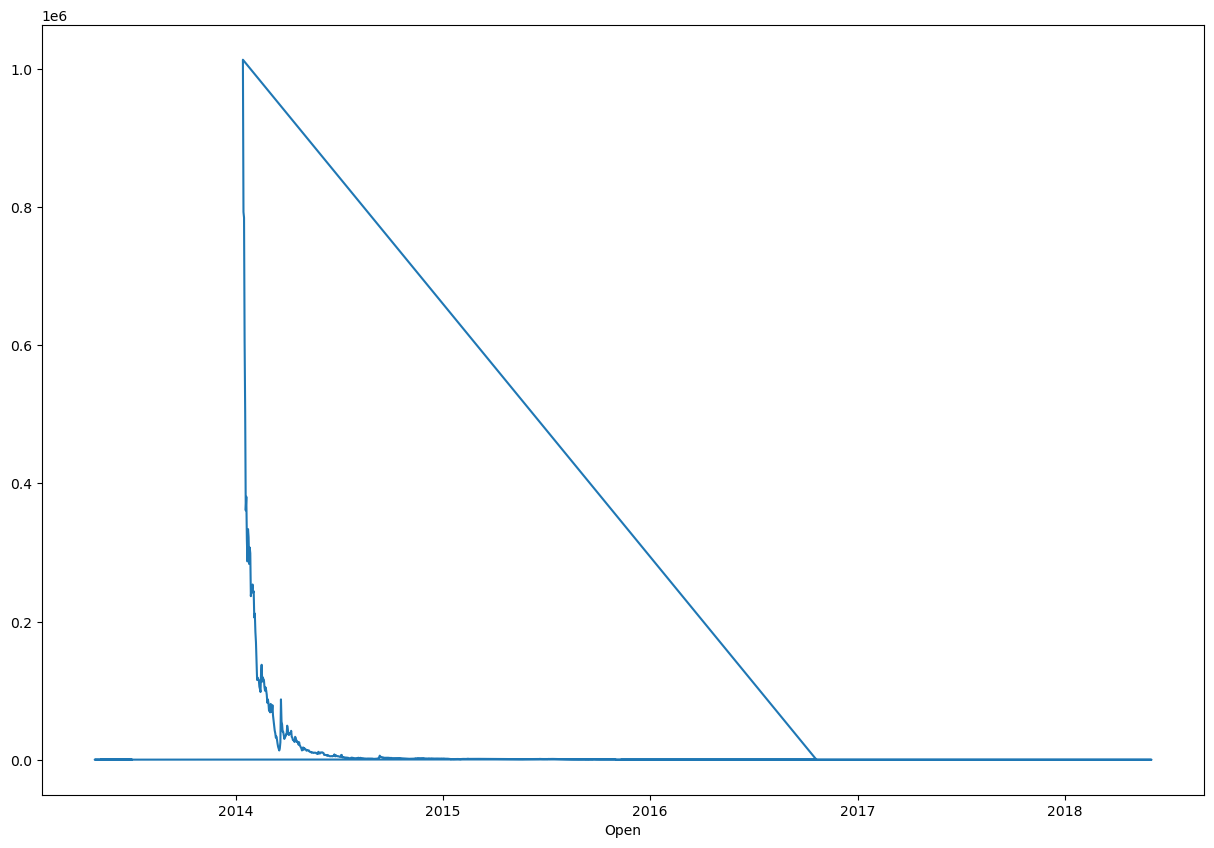

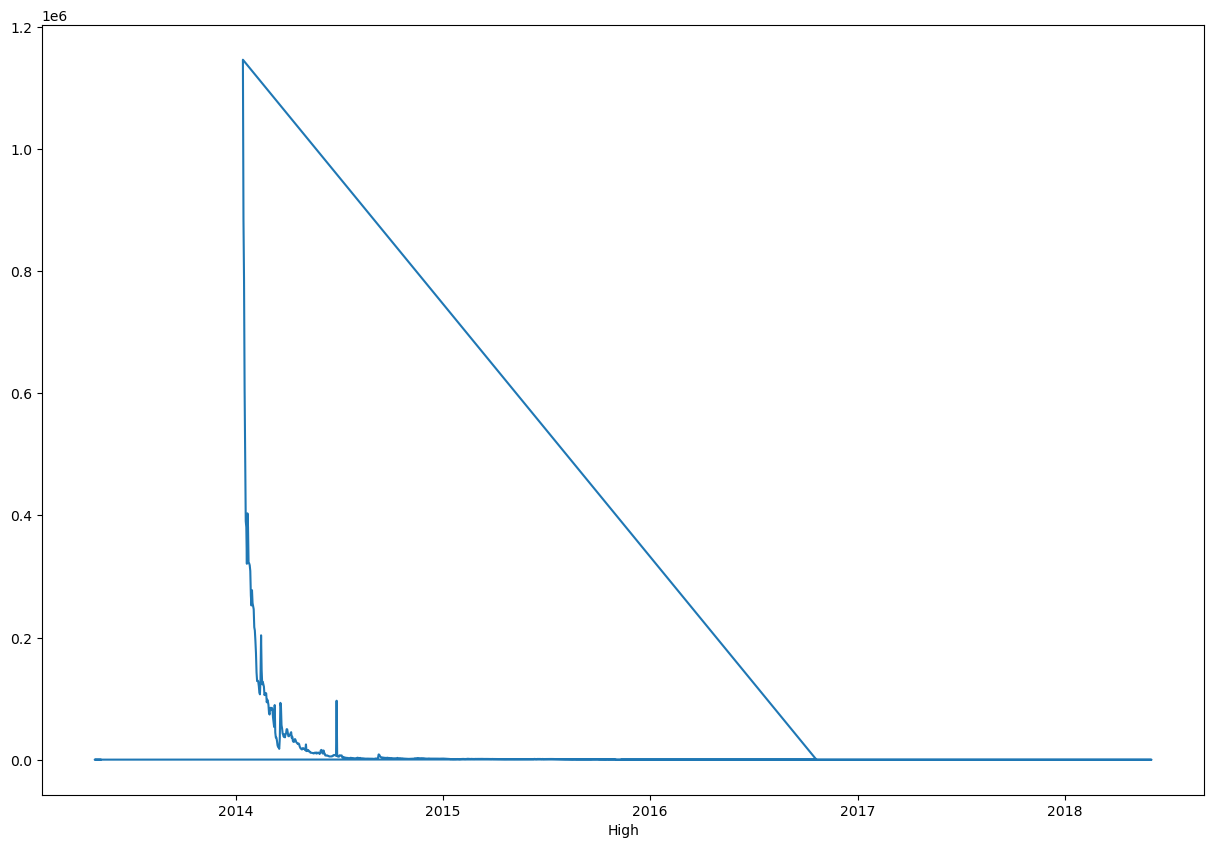

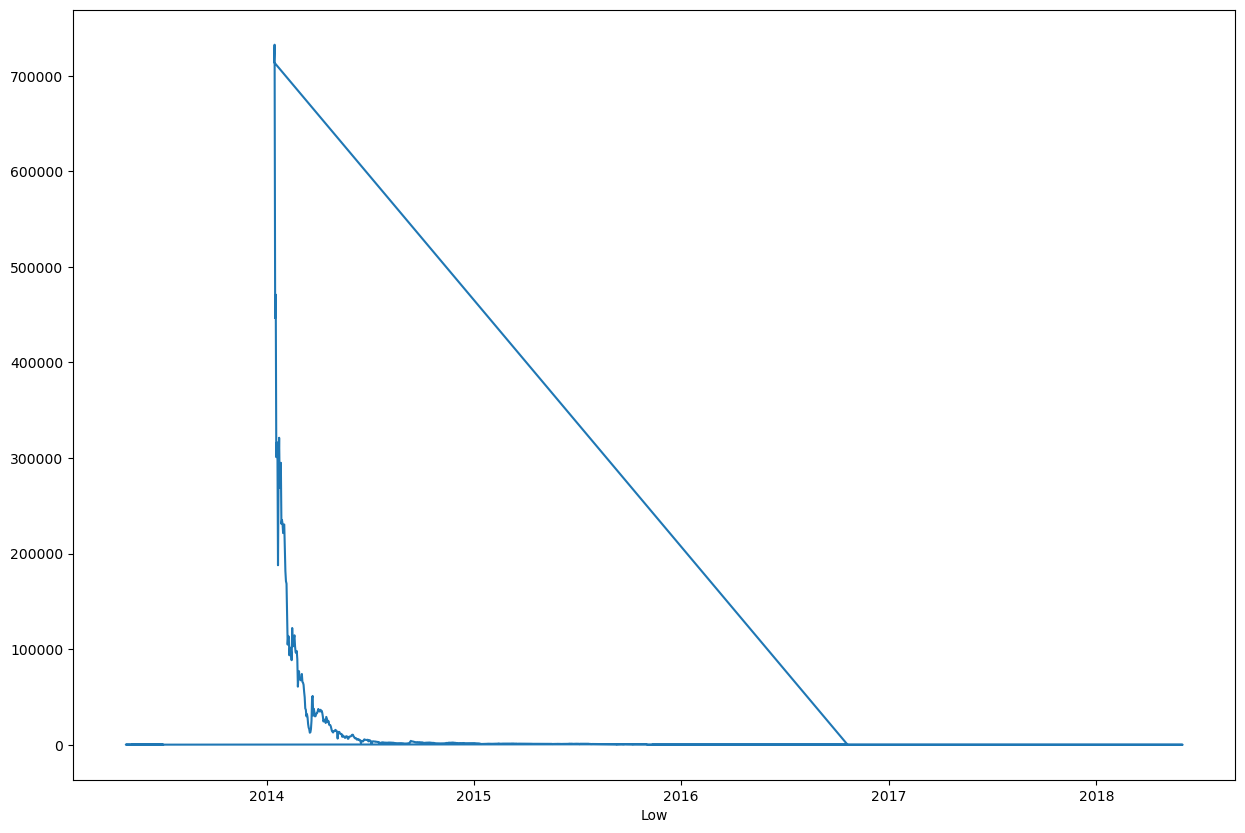

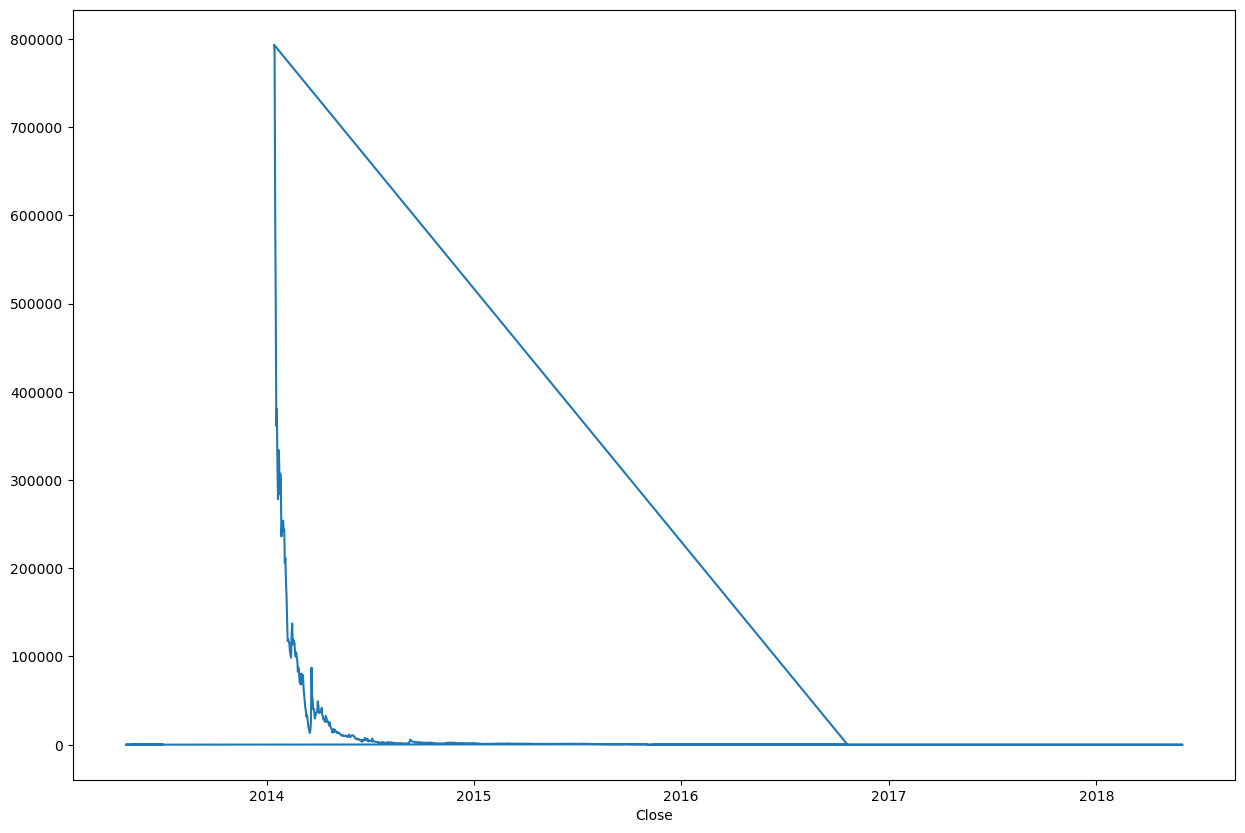

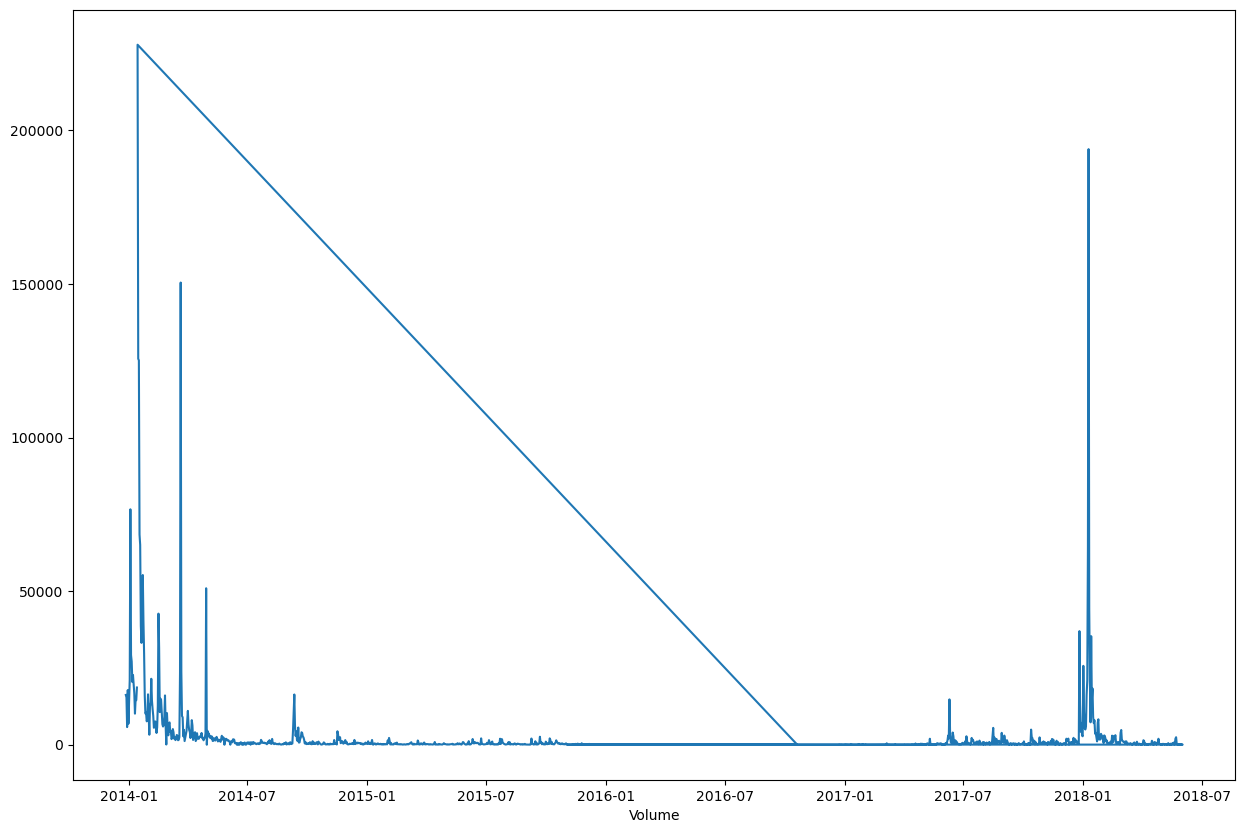

In [23]:
for i in data.columns:
    plt.figure(figsize=(15,10))
    plt.plot(data.index,data[i])
    plt.xlabel(i)
    plt.show()

In [24]:
data.shape

(1862, 5)

In [26]:
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2013-05-04,98.10,115.00,92.50,112.50,NaN
2013-05-05,112.90,118.80,107.14,115.91,NaN
2013-05-06,115.98,124.66,106.64,112.30,NaN
2013-05-07,112.25,113.44,97.70,111.50,NaN
2013-05-08,109.60,115.78,109.60,113.57,NaN


In [27]:
data1 = data.sort_index()
data1

,Open,High,Low,Close,Volume
Date,,,,,
2013-04-28,135.300000,135.980000,132.100000,134.210000,NaN
2013-04-29,134.440000,147.490000,134.000000,144.540000,NaN
2013-04-30,144.000000,146.930000,134.050000,139.000000,NaN
2013-05-01,139.000000,139.890000,107.720000,116.990000,NaN
2013-05-02,116.380000,125.600000,92.280000,105.210000,NaN
...,...,...,...,...,...
2018-05-29,0.001281,0.001496,0.001274,0.001492,20.0
2018-05-30,0.001493,0.001510,0.001315,0.001329,180.0
2018-05-31,0.001329,0.001442,0.001322,0.001348,40.0


###### Decomposition

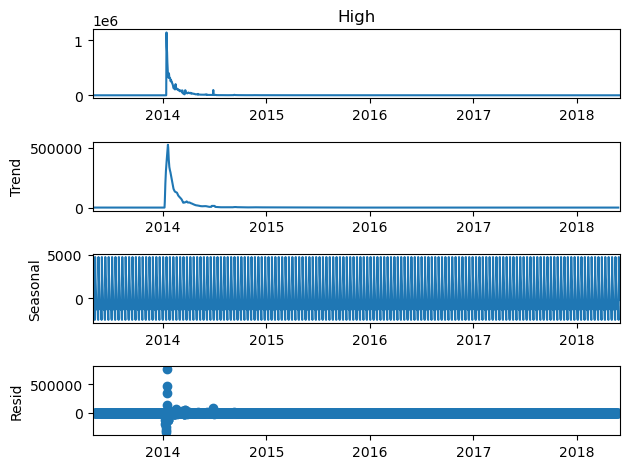

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
sea_dec1 = seasonal_decompose(data1['High'], period = 12)
sea_dec1.plot();

In [29]:
data1.head(50)

,Open,High,Low,Close,Volume
Date,,,,,
2013-04-28,135.30,135.98,132.10,134.21,NaN
2013-04-29,134.44,147.49,134.00,144.54,NaN
2013-04-30,144.00,146.93,134.05,139.00,NaN
2013-05-01,139.00,139.89,107.72,116.99,NaN
2013-05-02,116.38,125.60,92.28,105.21,NaN
2013-05-03,106.25,108.13,79.10,97.75,NaN
2013-05-04,98.10,115.00,92.50,112.50,NaN
2013-05-05,112.90,118.80,107.14,115.91,NaN
2013-05-06,115.98,124.66,106.64,112.30,NaN


In [30]:
data2 = pd.DataFrame(data1['High'])
data2.index = data1.index
data2

,High
Date,
2013-04-28,135.980000
2013-04-29,147.490000
2013-04-30,146.930000
2013-05-01,139.890000
2013-05-02,125.600000
...,...
2018-05-29,0.001496
2018-05-30,0.001510
2018-05-31,0.001442


In [31]:
data3 = data2.copy()
data4 = data2.copy()

###### Normalisation of data

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaled_data = MinMaxScaler()
data3['High'] = scaled_data.fit_transform(data3)

In [34]:
data3

,High
Date,
2013-04-28,1.186231e-04
2013-04-29,1.286639e-04
2013-04-30,1.281754e-04
2013-05-01,1.220340e-04
2013-05-02,1.095680e-04
...,...
2018-05-29,1.305042e-09
2018-05-30,1.317255e-09
2018-05-31,1.257934e-09


In [35]:
data4

,High
Date,
2013-04-28,135.980000
2013-04-29,147.490000
2013-04-30,146.930000
2013-05-01,139.890000
2013-05-02,125.600000
...,...
2018-05-29,0.001496
2018-05-30,0.001510
2018-05-31,0.001442


In [36]:
df = data4.loc[data4['High']>1]
data4.drop(index = list(df.index), inplace = True)

In [37]:
df['High'] = scaled_data.fit_transform(df)

In [38]:
df1 = pd.concat([df,data4], axis = 0 )
df1.sort_index()

,High
Date,
2013-04-28,0.000118
2013-04-29,0.000128
2013-04-30,0.000127
2013-05-01,0.000121
2013-05-02,0.000109
...,...
2018-05-29,0.001496
2018-05-30,0.001510
2018-05-31,0.001442


In [39]:
df1

,High
Date,
2013-04-28,0.000118
2013-04-29,0.000128
2013-04-30,0.000127
2013-05-01,0.000121
2013-05-02,0.000109
...,...
2018-05-29,0.001496
2018-05-30,0.001510
2018-05-31,0.001442


<AxesSubplot:xlabel='Date'>

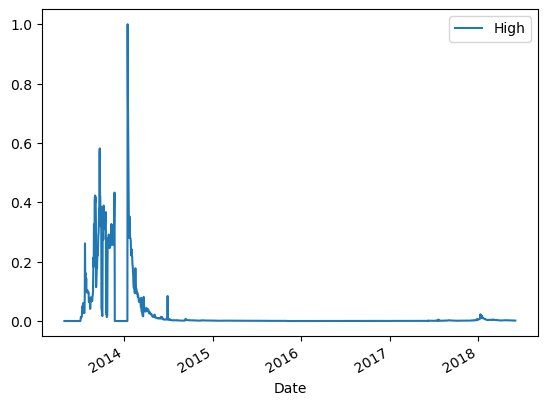

In [40]:
df1.plot()

###### Train_Test_Split

In [41]:
train_len = math.ceil(len(df1)*0.8)

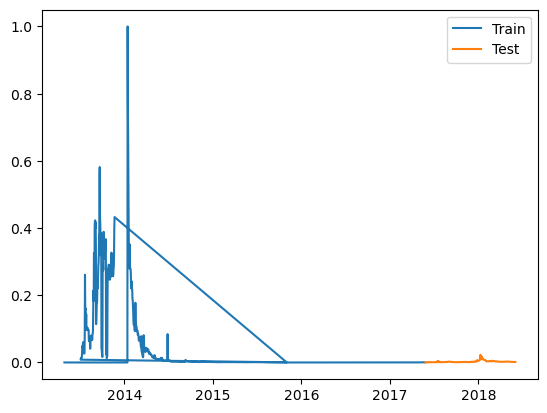

In [42]:
train_ds = df1.iloc[:train_len]
test_ds = df1.iloc[train_len:]
plt.plot(train_ds,label = 'Train')
plt.plot(test_ds, label = 'Test')
plt.legend()
plt.show()

In [43]:
train_ds.shape, test_ds.shape

((1490, 1), (372, 1))

In [44]:
train_ds

,High
Date,
2013-04-28,0.000118
2013-04-29,0.000128
2013-04-30,0.000127
2013-05-01,0.000121
2013-05-02,0.000109
...,...
2017-05-22,0.000471
2017-05-23,0.000448
2017-05-24,0.000380


<AxesSubplot:xlabel='Date'>

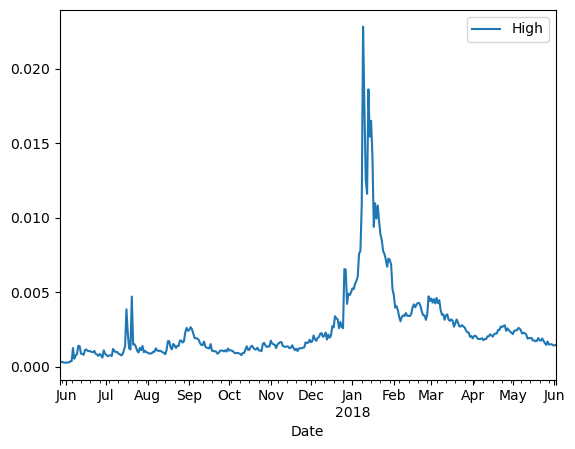

In [45]:
test_ds.plot()

In [46]:
test_ds

,High
Date,
2017-05-27,0.000329
2017-05-28,0.000317
2017-05-29,0.000314
2017-05-30,0.000275
2017-05-31,0.000268
...,...
2018-05-29,0.001496
2018-05-30,0.001510
2018-05-31,0.001442


In [47]:
train_x = pd.Series(train_ds['High'].values)
train_x.index = train_ds.index
past = 50
x_train = []
y_train = []
y_train_index = []
for i in range(past,len(train_x)):
    x_train.append(train_x[i - past:i])
    y_train.append(train_x[i])
    y_train_index.append(train_x.index[i])
x_train1 = np.array(x_train)
y_train1 = np.array(y_train)
x_train1.shape, y_train1.shape

((1440, 50), (1440,))

In [48]:
test_x = pd.Series(test_ds['High'].values)
test_x.index = test_ds.index
x_test = []
y_test = []
y_test_index = []
for i in range(past,len(test_x)):
    x_test.append(test_x[i - past:i])
    y_test.append(test_x[i])
    y_test_index.append(test_x.index[i])
x_test1 = np.array(x_test)
y_test1 = np.array(y_test)
x_test1.shape, y_test1.shape

((322, 50), (322,))

In [49]:
x_train1 = np.reshape(x_train1,(x_train1.shape[0],x_train1.shape[1],1))
x_test1 = np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1],1))

In [50]:
x_train1.shape, x_test1.shape

((1440, 50, 1), (322, 50, 1))

## Model Building

### LSTM

In [51]:
from keras.callbacks import ModelCheckpoint

In [52]:
pwd

'C:\\Users\\Hp\\Downloads'

In [53]:
path = "C:\\Users\\Hp\\LSTM3-{epoch:02d}-{val_loss:.4f}.h5"
callback1 = ModelCheckpoint(filepath=path, monitor='val_loss',mode='min',save_best_only=True,verbose = 1)

In [54]:
# Model
Model = Sequential()
Model.add(LSTM(50,activation='relu',input_shape= (x_train1.shape[1],1)))
#Model.add(LSTM(100,activation = 'relu', return_sequences= True))
Model.add(Dense(1))

In [55]:
Model.compile(optimizer='adam',loss = 'mse')

In [56]:
H1= Model.fit(x_train1,y_train1,validation_data=(x_test1,y_test1),epochs=100,callbacks=[callback1])

Epoch 1/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0069
Epoch 1: val_loss improved from inf to 0.00047, saving model to C:\Users\Hp\LSTM3-01-0.0005.h5
45/45 [==============================] - 3s 36ms/step - loss: 0.0066 - val_loss: 4.7081e-04
Epoch 2/100
45/45 [==============================] - ETA: 0s - loss: 0.0035
Epoch 2: val_loss improved from 0.00047 to 0.00007, saving model to C:\Users\Hp\LSTM3-02-0.0001.h5
45/45 [==============================] - 1s 28ms/step - loss: 0.0035 - val_loss: 7.1750e-05
Epoch 3/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0033
Epoch 3: val_loss improved from 0.00007 to 0.00005, saving model to C:\Users\Hp\LSTM3-03-0.0001.h5
45/45 [==============================] - 1s 27ms/step - loss: 0.0031 - val_loss: 5.2612e-05
Epoch 4/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0030
Epoch 4: val_loss improved from 0.00005 to 0.00002, saving model to C:\Users\Hp\LSTM3-04-0.0000.h5
45/45 [=====================

Epoch 37/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0021
Epoch 37: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 27ms/step - loss: 0.0020 - val_loss: 1.3936e-05
Epoch 38/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0020
Epoch 38: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 29ms/step - loss: 0.0019 - val_loss: 4.3340e-05
Epoch 39/100
45/45 [==============================] - ETA: 0s - loss: 0.0019
Epoch 39: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 30ms/step - loss: 0.0019 - val_loss: 2.5081e-06
Epoch 40/100
44/45 [============================>.] - ETA: 0s - loss: 0.0018
Epoch 40: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 31ms/step - loss: 0.0018 - val_loss: 7.8838e-05
Epoch 41/100
45/45 [==============================] - ETA: 0s - loss: 0.0019
Epoch 41: val_loss did not improve from 0.00000
45/45 [

Epoch 74/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0014
Epoch 74: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 30ms/step - loss: 0.0014 - val_loss: 6.2189e-05
Epoch 75/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0014
Epoch 75: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 30ms/step - loss: 0.0013 - val_loss: 1.2573e-06
Epoch 76/100
45/45 [==============================] - ETA: 0s - loss: 0.0014  
Epoch 76: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 29ms/step - loss: 0.0014 - val_loss: 8.2715e-05
Epoch 77/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0015
Epoch 77: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 29ms/step - loss: 0.0014 - val_loss: 4.9083e-06
Epoch 78/100
44/45 [============================>.] - ETA: 0s - loss: 0.0015
Epoch 78: val_loss did not improve from 0.00000
45/45

In [57]:
from keras.models import load_model

In [58]:
Lstm = load_model("C:\\Users\\Hp\\Downloads\\LSTM3-98-0.0000.h5")

In [59]:
pred = Lstm.predict(x_test1)

11/11 [==============================] - 0s 14ms/step


In [60]:
dff = pd.DataFrame({'Actual':list(y_test1),'Predicted':list(pred)})
dff1 = scaled_data.inverse_transform(dff)
dff2 = pd.DataFrame(dff1,columns = ['Actual','Predicted'])
dff2.index = y_test_index
dff2

,Actual,Predicted
2017-07-16,4416.820018,1526.810076
2017-07-17,2596.465763,3386.775200
2017-07-18,1398.562617,2882.619552
2017-07-19,1332.076127,2005.230337
2017-07-20,5392.337316,1654.727950
...,...,...
2018-05-29,1716.092925,1887.866682
2018-05-30,1732.141388,1862.823095
2018-05-31,1654.191710,1861.420279
2018-06-01,1624.387421,1811.472960


##### Forcasting

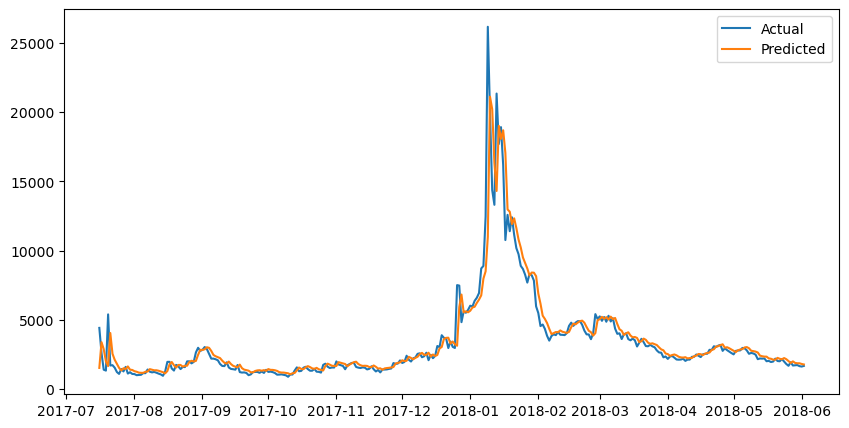

In [61]:
plt.figure(figsize=(10,5))
plt.plot(dff2['Actual'],label = 'Actual')
plt.plot(dff2['Predicted'], label = 'Predicted')
plt.legend()
plt.show()

##### Performing Metrics

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2 = r2_score(dff2['Actual'],dff2['Predicted'])
r2

0.8561069321166346

In [64]:
mse = mean_squared_error(dff2['Actual'],dff2['Predicted'])
rmse = (mse)**(1/2)
print(mse)
print(rmse)

1539173.5487993825
1240.6343332341655


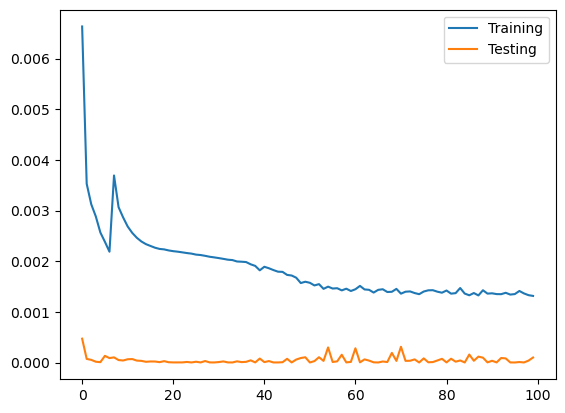

In [65]:
plt.plot(H1.epoch,H1.history['loss'],label = 'Training')
plt.plot(H1.epoch,H1.history['val_loss'], label = 'Testing')
plt.legend()
plt.show()

### Simple RNN

In [66]:
path2 =  "C:\\Users\\Hp\\RNN-{epoch:02d}-{val_loss:.4f}.h5"
callback2 = ModelCheckpoint(filepath=path2, monitor='val_loss',mode='min',save_best_only=True,verbose = 1)

In [67]:
Model1 = Sequential()
Model1.add(SimpleRNN(50, activation='relu',input_shape=(x_train1.shape[1],1)))
Model1.add(Dense(1))

In [68]:
Model1.compile(optimizer='adam', loss = 'mse')

In [69]:
H2 = Model1.fit(x_train1, y_train1, validation_data = (x_test1, y_test1), callbacks=[callback2], epochs = 100)

Epoch 1/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0032
Epoch 1: val_loss improved from inf to 0.00002, saving model to C:\Users\Hp\RNN-01-0.0000.h5
45/45 [==============================] - 2s 20ms/step - loss: 0.0031 - val_loss: 1.8023e-05
Epoch 2/100
45/45 [==============================] - ETA: 0s - loss: 0.0017
Epoch 2: val_loss improved from 0.00002 to 0.00002, saving model to C:\Users\Hp\RNN-02-0.0000.h5
45/45 [==============================] - 1s 15ms/step - loss: 0.0017 - val_loss: 1.5656e-05
Epoch 3/100
40/45 [=========================>....] - ETA: 0s - loss: 0.0018
Epoch 3: val_loss improved from 0.00002 to 0.00000, saving model to C:\Users\Hp\RNN-03-0.0000.h5
45/45 [==============================] - 1s 15ms/step - loss: 0.0016 - val_loss: 4.6473e-06
Epoch 4/100
42/45 [===========================>..] - ETA: 0s - loss: 0.0016
Epoch 4: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 15ms/step - loss: 0.0015 - val_loss: 4.587

Epoch 37/100
44/45 [============================>.] - ETA: 0s - loss: 0.0013
Epoch 37: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 13ms/step - loss: 0.0013 - val_loss: 2.1818e-05
Epoch 38/100
41/45 [==========================>...] - ETA: 0s - loss: 0.0013
Epoch 38: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 1.3907e-06
Epoch 39/100
44/45 [============================>.] - ETA: 0s - loss: 0.0013   
Epoch 39: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 13ms/step - loss: 0.0013 - val_loss: 2.6161e-05
Epoch 40/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0013   
Epoch 40: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 13ms/step - loss: 0.0013 - val_loss: 1.8216e-05
Epoch 41/100
45/45 [==============================] - ETA: 0s - loss: 0.0013
Epoch 41: val_loss did not improve from 0.00000
4

45/45 [==============================] - 1s 15ms/step - loss: 0.0012 - val_loss: 6.0313e-06
Epoch 75/100
44/45 [============================>.] - ETA: 0s - loss: 0.0012
Epoch 75: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 2.5256e-06
Epoch 76/100
44/45 [============================>.] - ETA: 0s - loss: 0.0011   
Epoch 76: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 12ms/step - loss: 0.0012 - val_loss: 1.4976e-05
Epoch 77/100
42/45 [===========================>..] - ETA: 0s - loss: 0.0013
Epoch 77: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 1.2236e-05
Epoch 78/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0012    
Epoch 78: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 1.2131e-04
Epoch 79/100
43/45 [=============

In [70]:
RNN = load_model("C:\\Users\\Hp\\Downloads\\RNN-56-0.0000.h5")

In [71]:
pred1 = RNN.predict(x_test1)

11/11 [==============================] - 0s 6ms/step


In [72]:
dfff = pd.DataFrame({'Actual':list(y_test1),'Predicted':list(pred1)})
dfff1 = scaled_data.inverse_transform(dfff)
dfff2 = pd.DataFrame(dfff1,columns = ['Actual','Predicted'])
dfff2.index = y_test_index
dfff2

,Actual,Predicted
2017-07-16,4416.820018,1805.964182
2017-07-17,2596.465763,4517.880993
2017-07-18,1398.562617,2070.673762
2017-07-19,1332.076127,1807.648843
2017-07-20,5392.337316,2184.606174
...,...,...
2018-05-29,1716.092925,1872.795478
2018-05-30,1732.141388,1997.699539
2018-05-31,1654.191710,2013.709157
2018-06-01,1624.387421,1870.141443


##### Forcasting

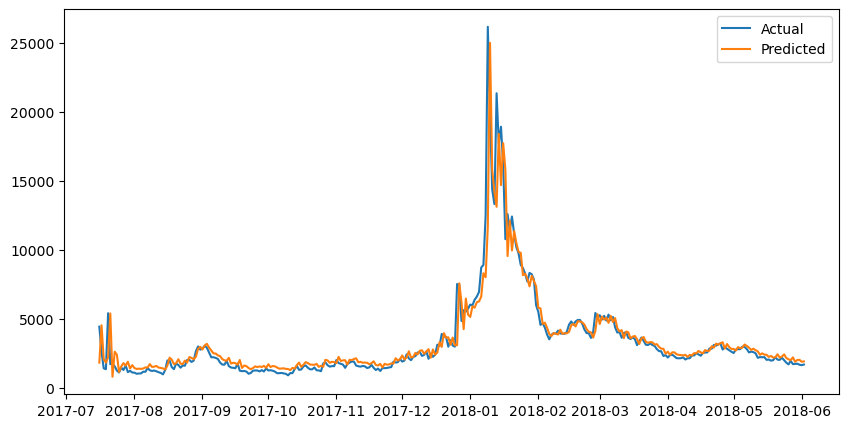

In [73]:
plt.figure(figsize = (10,5))
plt.plot(dfff2['Actual'],label = 'Actual')
plt.plot(dfff2['Predicted'], label = 'Predicted')
plt.legend()
plt.show()

##### Performance Metrics

In [74]:
r21 = r2_score(dfff2['Actual'],dfff2['Predicted'])
r21

0.8574661620780613

In [75]:
mse = mean_squared_error(dfff2['Actual'],dfff2['Predicted'])
rmse = (mse)**(1/2)
print(mse)
print(rmse)

1524634.3438596476
1234.7608448034168


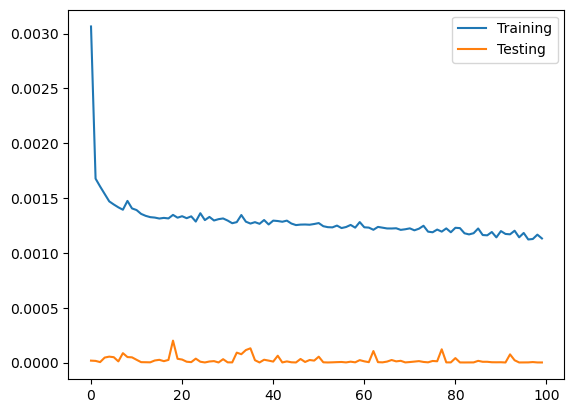

In [76]:
plt.plot(H2.epoch,H2.history['loss'],label = 'Training')
plt.plot(H2.epoch,H2.history['val_loss'], label = 'Testing')
plt.legend()
plt.show()

### GRU

In [77]:
Path3 =  "C:\\Users\\Hp\\GRU-{epoch:02d}-{val_loss:.4f}.h5"
callback2 = ModelCheckpoint(filepath=Path3, monitor='val_loss',mode='min',save_best_only=True,verbose = 1)

In [78]:
Model3 = Sequential()
Model3.add(GRU(50, activation = 'relu', input_shape = (x_train1.shape[1],1)))
Model3.add(Dense(1))

In [79]:
Model3.compile(optimizer='adam', loss='mse')

In [80]:
H3 = Model3.fit(x_train1, y_train1, validation_data=(x_test1, y_test1), epochs = 100, callbacks=[callback2], verbose = 1)

Epoch 1/100
44/45 [============================>.] - ETA: 0s - loss: 0.0041
Epoch 1: val_loss improved from inf to 0.00001, saving model to C:\Users\Hp\GRU-01-0.0000.h5
45/45 [==============================] - 3s 31ms/step - loss: 0.0041 - val_loss: 9.7114e-06
Epoch 2/100
45/45 [==============================] - ETA: 0s - loss: 0.0020
Epoch 2: val_loss improved from 0.00001 to 0.00000, saving model to C:\Users\Hp\GRU-02-0.0000.h5
45/45 [==============================] - 1s 26ms/step - loss: 0.0020 - val_loss: 2.7088e-06
Epoch 3/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0019
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to C:\Users\Hp\GRU-03-0.0000.h5
45/45 [==============================] - 1s 25ms/step - loss: 0.0019 - val_loss: 1.6936e-06
Epoch 4/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0018
Epoch 4: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 24ms/step - loss: 0.0018 - val_loss: 2.525

Epoch 38/100
45/45 [==============================] - ETA: 0s - loss: 0.0013 
Epoch 38: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 30ms/step - loss: 0.0013 - val_loss: 2.5390e-06
Epoch 39/100
44/45 [============================>.] - ETA: 0s - loss: 0.0013
Epoch 39: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 28ms/step - loss: 0.0013 - val_loss: 5.9760e-05
Epoch 40/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0014
Epoch 40: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 29ms/step - loss: 0.0013 - val_loss: 3.7926e-05
Epoch 41/100
45/45 [==============================] - ETA: 0s - loss: 0.0013 
Epoch 41: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 26ms/step - loss: 0.0013 - val_loss: 5.7507e-06
Epoch 42/100
44/45 [============================>.] - ETA: 0s - loss: 0.0013
Epoch 42: val_loss did not improve from 0.00000
45/45

45/45 [==============================] - 1s 24ms/step - loss: 0.0013 - val_loss: 3.6378e-05
Epoch 76/100
44/45 [============================>.] - ETA: 0s - loss: 0.0012
Epoch 76: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 23ms/step - loss: 0.0013 - val_loss: 8.6811e-06
Epoch 77/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0014
Epoch 77: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 23ms/step - loss: 0.0013 - val_loss: 3.3742e-05
Epoch 78/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0014
Epoch 78: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 23ms/step - loss: 0.0013 - val_loss: 1.2808e-06
Epoch 79/100
43/45 [===========================>..] - ETA: 0s - loss: 0.0013
Epoch 79: val_loss did not improve from 0.00000
45/45 [==============================] - 1s 23ms/step - loss: 0.0013 - val_loss: 1.3154e-06
Epoch 80/100
45/45 [====================

In [81]:
GRU_Model = load_model("C:\\Users\\Hp\\Downloads\\GRU-71-0.0000.h5")

In [82]:
GRU_Pred = GRU_Model.predict(x_test1)

11/11 [==============================] - 0s 11ms/step


In [83]:
GRU_df = pd.DataFrame({'Actual':list(y_test1),'Predicted':list(GRU_Pred)})
GRU_data = scaled_data.inverse_transform(GRU_df)
GRU_Forcast = pd.DataFrame(GRU_data, columns = ['Actual','Predicted'])
GRU_Forcast.index = y_test_index
GRU_Forcast

,Actual,Predicted
2017-07-16,4416.820018,1374.390951
2017-07-17,2596.465763,4228.815357
2017-07-18,1398.562617,2541.350774
2017-07-19,1332.076127,1188.717385
2017-07-20,5392.337316,1079.893404
...,...,...
2018-05-29,1716.092925,1511.230697
2018-05-30,1732.141388,1510.278405
2018-05-31,1654.191710,1529.747023
2018-06-01,1624.387421,1453.081065


##### Forcasting

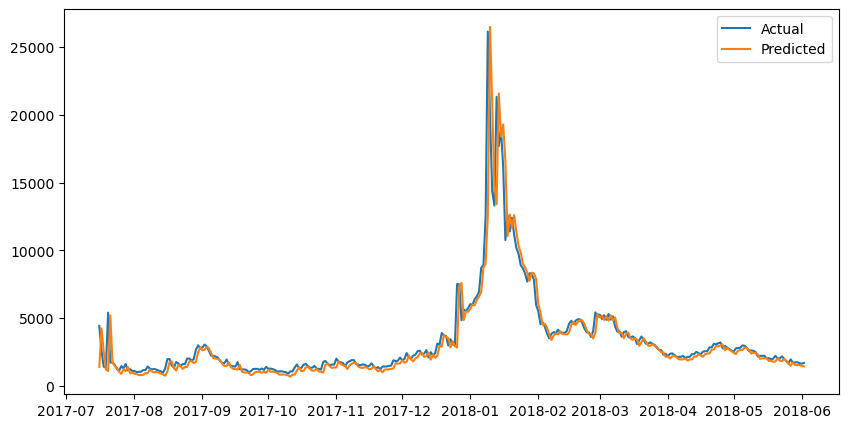

In [84]:
plt.figure(figsize = (10,5))
plt.plot(GRU_Forcast['Actual'],label = 'Actual')
plt.plot(GRU_Forcast['Predicted'], label = 'Predicted')
plt.legend()
plt.show()

##### Performance Metrics

In [85]:
r22 = r2_score(GRU_Forcast['Actual'],GRU_Forcast['Predicted'])
r22

0.8470836830616301

In [86]:
mse = mean_squared_error(GRU_Forcast['Actual'],GRU_Forcast['Predicted'])
rmse = (mse)**(1/2)
print(mse)
print(rmse)

1635692.0710186
1278.941777806402


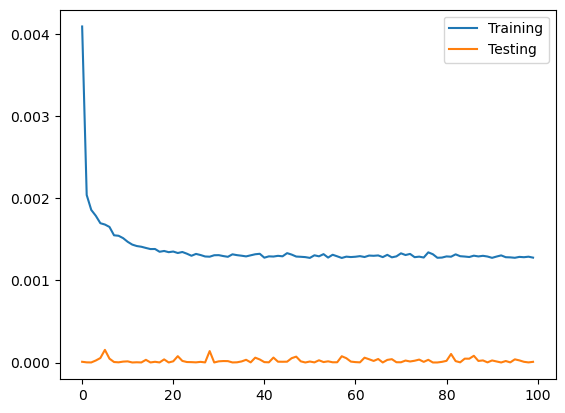

In [87]:
plt.plot(H3.epoch,H3.history['loss'],label = 'Training')
plt.plot(H3.epoch,H3.history['val_loss'], label = 'Testing')
plt.legend()
plt.show()

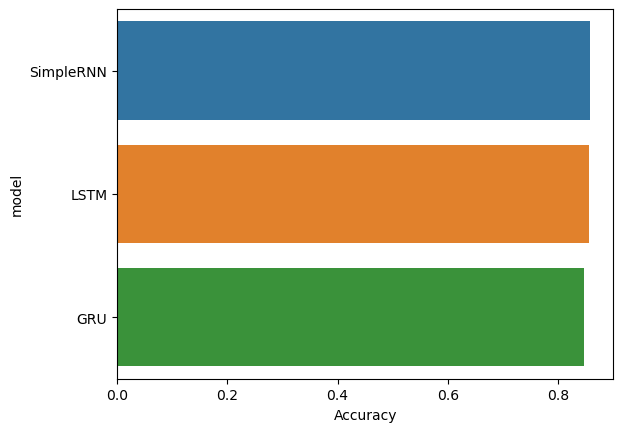

In [88]:
bar_df=pd.DataFrame({'model':['LSTM','SimpleRNN','GRU'],'Accuracy':[r2,r2_score(dfff2['Actual'],dfff2['Predicted']),
                                                                   r2_score(GRU_Forcast['Actual'],GRU_Forcast['Predicted'])]})
sor=bar_df.sort_values('Accuracy',ascending=False)
sns.barplot(data=sor,x=sor['Accuracy'],y=sor['model'])
plt.show()